In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the csv file
ln=pd.read_csv("loan.csv")

In [3]:
ln

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
ln.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
ln.shape

(614, 13)

In [6]:
ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
ln.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
cols = ["Gender", "Married","Dependents","Self_Employed"]
ln[cols]=ln[cols].fillna(ln.mode().iloc[0])

In [9]:
ln.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
cols = ["LoanAmount", "Loan_Amount_Term","Credit_History"]
ln[cols]=ln[cols].fillna(ln.mean().iloc[0])

In [11]:
ln.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
#describing the dataset
ln.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,334.775414,457.407866,440.794730
std,6109.041673,2926.248369,981.515962,758.873005,1478.816648
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,175.000000,360.000000,1.000000
max,81000.000000,41667.000000,5403.459283,5403.459283,5403.459283


In [13]:
#checking the correlation 
ln.cor=ln.corr()
ln.cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.047713,-0.035559,-0.034654
CoapplicantIncome,-0.116605,1.000000,-0.021724,0.000674,0.104296
LoanAmount,0.047713,-0.021724,1.000000,-0.034605,-0.020906
Loan_Amount_Term,-0.035559,0.000674,-0.034605,1.000000,-0.046005
Credit_History,-0.034654,0.104296,-0.020906,-0.046005,1.000000


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

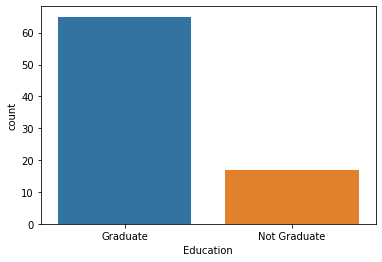

In [15]:
sns.countplot(x="Education",data=ln.loc[ln["Self_Employed"]=="Yes"])
plt.show()
#from the below graph we can see that more self_employed person are graduated

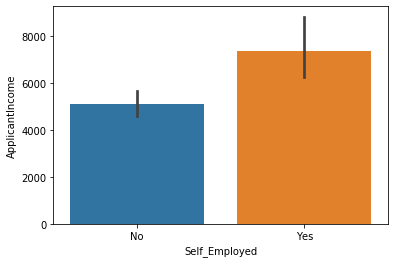

In [16]:
sns.barplot(y="ApplicantIncome",x="Self_Employed",data=ln)
plt.show()

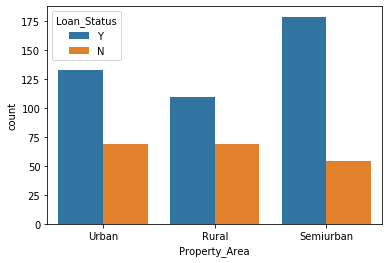

In [17]:
sns.countplot(x="Property_Area",hue="Loan_Status",data=ln)
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x27801debb08>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x27801d67f08>,
 'cmins': <matplotlib.collections.LineCollection at 0x27801debdc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x27801df8f08>}

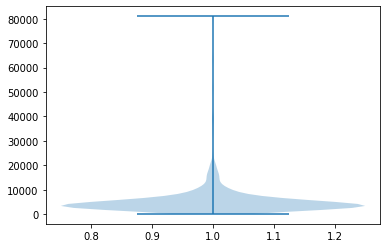

In [18]:
plt.violinplot(ln['ApplicantIncome'])

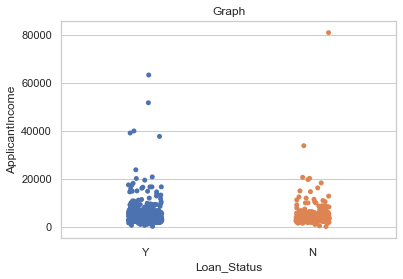

In [19]:
sns.set(style="whitegrid")
ax=sns.stripplot(x='Loan_Status',y='ApplicantIncome',data=ln);
plt.title('Graph')
plt.show()

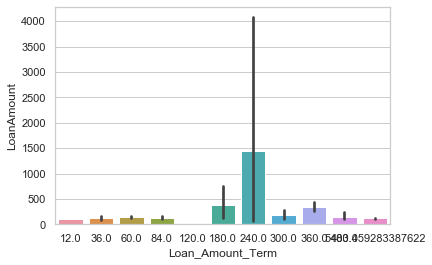

In [20]:
sns.barplot(x='Loan_Amount_Term',y='LoanAmount',data=ln)

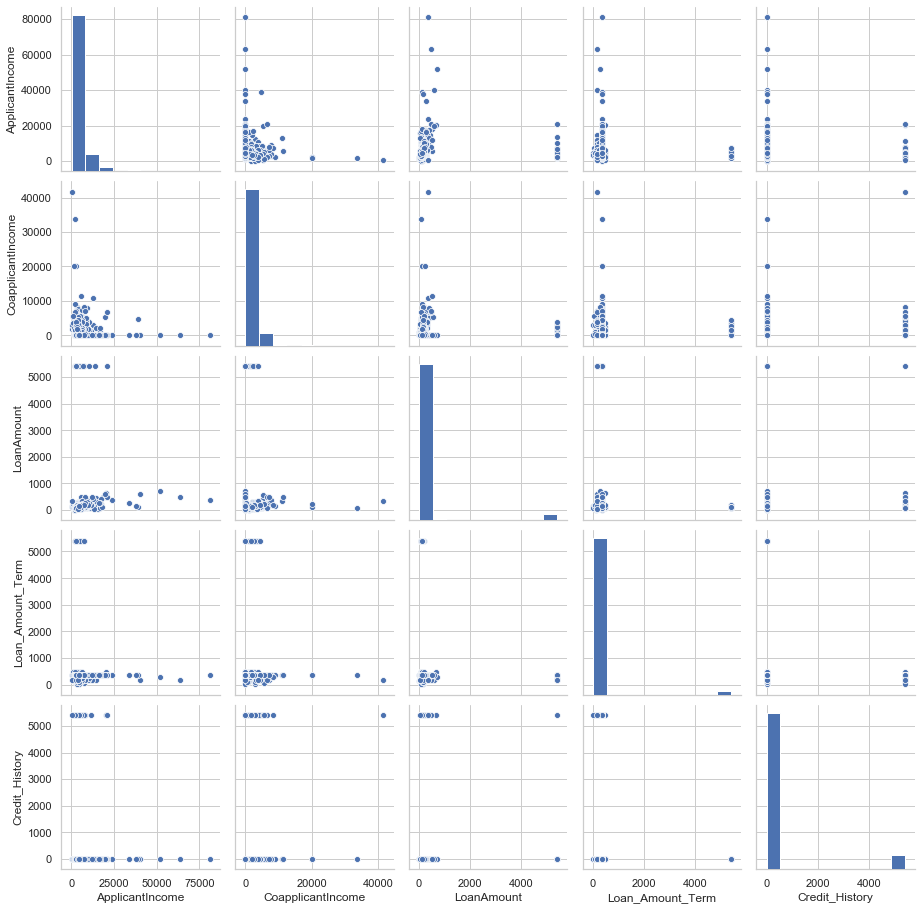

In [21]:
sns.pairplot(ln)

In [22]:
x=ln.drop(columns=["Loan_Status"])
y=ln[["Loan_Status"]]

In [23]:
#checking of skewness
ln.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           4.949384
Loan_Amount_Term     6.335646
Credit_History       3.068326
dtype: float64

In [24]:
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])

In [25]:
x.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount           2.536007
Loan_Amount_Term     2.169977
Credit_History       2.999597
dtype: float64

In [26]:
x.drop(columns=["Loan_ID"],inplace=True)

In [27]:
x=pd.get_dummies(x,drop_first=True)

In [28]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,8.594980,5.888878,0.693147,1,0,0,0,0,0,0,0,1
1,8.430327,7.319202,4.859812,5.888878,0.693147,1,1,1,0,0,0,0,0,0
2,8.006701,0.000000,4.204693,5.888878,0.693147,1,1,0,0,0,0,1,0,1
3,7.857094,7.765993,4.795791,5.888878,0.693147,1,1,0,0,0,1,0,0,1
4,8.699681,0.000000,4.955827,5.888878,0.693147,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7.972811,0.000000,4.276666,5.888878,0.693147,0,0,0,0,0,0,0,0,0
610,8.320448,0.000000,3.713572,5.198497,0.693147,1,1,0,0,1,0,0,0,0
611,8.996280,5.484797,5.537334,5.888878,0.693147,1,1,1,0,0,0,0,0,1
612,8.933796,0.000000,5.236442,5.888878,0.693147,1,1,0,1,0,0,0,0,1


In [29]:
y

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [31]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
x=scx.fit_transform(x)
x

array([[ 0.51618627, -1.10778298,  4.23445944, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [ 0.13780585,  0.78215757, -0.16503206, ..., -0.39260074,
        -0.7820157 , -0.70020801],
       [-0.51947937, -1.10778298, -0.93666923, ...,  2.54711697,
        -0.7820157 ,  1.42814704],
       ...,
       [ 1.01592074,  0.30848337,  0.63299155, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [ 0.91897195, -1.10778298,  0.27858356, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [ 0.13780585, -1.10778298, -0.12024124, ...,  2.54711697,
         1.2787467 , -0.70020801]])

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [34]:
def max_aucroc(grs,x,y):
    max_aucroc=0
    for r_state in range(40,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.22)
        grs.fit(x_train,y_train)
        y_pred = grs.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        if aucroc_scr>max_aucroc:
            max_aucroc=aucroc_scr
            final_r_state=r_state
    print("max auc roc score for ",final_r_state," is ",max_aucroc)
    return final_r_state

In [57]:
lregr=LogisticRegression()
max_aucroc(lregr,x,y)

max auc roc score for  89  is  0.5817715019255455


89

In [58]:
from sklearn.model_selection import cross_val_score
cross_val_score(lregr,x,y,cv=5,scoring="r2").mean()
#not suffering from over fitting over under fitting

-0.47823914991097666

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
max_aucroc(dt,x,y)

max auc roc score for  69  is  0.7583145786446611


69

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt,x,y,cv=5,scoring="r2").mean()
#not suffering from over fitting over under fitting

-0.28919379897708086

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [62]:
neighbors={"n_neighbors":range(1,30)}
knn=KNeighborsClassifier()
grs=GridSearchCV(knn,neighbors,cv=10)
grs.fit(x,y)
grs.best_params_

{'n_neighbors': 29}

In [63]:
knn=KNeighborsClassifier(n_neighbors=29)
max_aucroc(knn,x,y)

max auc roc score for  69  is  0.5241310327581896


69

In [64]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x,y,cv=5,scoring="r2").mean()
#not suffering from over fitting over under fitting

-0.49290862903866

In [65]:
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [66]:
svc=SVC(kernel="rbf",C=10)
max_aucroc(svc,x,y)

max auc roc score for  82  is  0.7170731707317074


82

In [78]:
from sklearn.ensemble import RandomForestClassifier
parameters={"n_estimators":[10,100,500]}
rf=RandomForestClassifier()
grs = GridSearchCV(rf, parameters, cv=5,scoring="roc_auc")
grs.fit(x,y)
grs.best_params_

{'n_estimators': 500}

In [79]:
rf=RandomForestClassifier(n_estimators=500)
max_aucroc(rf,x,y)

max auc roc score for  63  is  0.7614327253502512


63

In [80]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf,x,y,cv=5,scoring="r2").mean()
#not suffering from over fitting over under fitting

-0.023256671089488434

In [81]:
from sklearn.ensemble import AdaBoostClassifier
ada_reg=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[rf,lregr,dt,knn,svc]}
grs = GridSearchCV(ada_reg, parameters, cv=5)
grs.fit(x,y)
grs.best_params_

{'base_estimator': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=500,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'learning_rate': 0.01,
 'n_estimators': 1000}

In [82]:
ada_reg=AdaBoostClassifier(base_estimator=rf,learning_rate=0.01,n_estimators=1000)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -0.008131414509123535
standard deviation in r2 score for ada boosting Regression:  0.10648440623285191


In [83]:
max_aucroc(ada_reg,x,y)

max auc roc score for  63  is  0.774253238170764


63

In [86]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

In [87]:
#As randomforest is showing the best results after boosting so we will save it for the production
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 63,test_size=0.22)
rf=RandomForestClassifier()
ada_reg=AdaBoostClassifier(base_estimator=rf,learning_rate=0.01,n_estimators=1000)
ada_reg.fit(x_train,y_train)
y_pred=ada_reg.predict(x_test)

In [88]:
print("f1 score is:" ,f1_score(y_test,y_pred))
print("Confusion Matrix is:",confusion_matrix(y_test,y_pred))
print("Classification Report is:" ,classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

f1 score is: 0.9029126213592232
Confusion Matrix is: [[23 16]
 [ 4 93]]
Classification Report is:               precision    recall  f1-score   support

           0       0.85      0.59      0.70        39
           1       0.85      0.96      0.90        97

    accuracy                           0.85       136
   macro avg       0.85      0.77      0.80       136
weighted avg       0.85      0.85      0.84       136

AUC ROC Score:  0.774253238170764


In [89]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(rf,'Fraud_Loan_rf.pk1')

['Fraud_Loan_rf.pk1']